In [ ]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'datamininghw1-415523' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=datamininghw1-415523:US:bquxjob_1683c5e0_18dec4cfd19)
back to BigQuery to edit the query within the BigQuery user interface.

In [ ]:
# Running this code will display the query used to generate your previous job
job = client.get_job('bquxjob_27dc9025_18dfc138ccb') # Job ID inserted based on the query results selected to explore
print(job.query)

-- SELECT * FROM `datamininghw1-415523.fire_dataset.fire_dataset` LIMIT 1000

SELECT *, 
  ST_GEOGPOINT(CAST(near_x AS FLOAT64), CAST(near_y AS FLOAT64)) AS geo_point
FROM `datamininghw1-415523.fire_dataset.fire_dataset`
LIMIT 100000;




# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [ ]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_27dc9025_18dfc138ccb') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,Incident_No,Date_Time_Of_Event,Dispatched_Time,Unit_On_The_Way_Time,Unit_On_Scene_TimeStamp,On_Scene_Unit,Cleared_TimeStamp,Unit_Count,Priority,Final_Incident_Type,Final_Incident_Category,Near_X,Near_Y,Station,Battalion,geo_point
0,F230219059,01/21/2023 06:15 AM,None,None,None,None,01/21/2023 06:21 AM,1,Priority 1,FIRE_OTHER,Other Fires,-121.895437,37.376831,05,BAT5,POINT(-121.895437 37.376831)
1,F230249229,01/24/2023 04:30 PM,None,None,None,None,01/24/2023 04:36 PM,1,Priority 1,FIRE_OTHER,Other Fires,0.000000,0.000000,03,BAT1,POINT(0 0)
2,F230289147,01/28/2023 12:50 PM,None,None,None,None,01/28/2023 12:57 PM,2,Priority 1,FIRE_OTHER,Other Fires,-121.887111,37.336278,01,BAT1,POINT(-121.887111 37.336278)
3,F230289234,01/28/2023 05:49 PM,None,None,None,None,01/28/2023 05:57 PM,1,Priority 1,FIRE_OTHER,Other Fires,-121.847873,37.331548,26,BAT1,POINT(-121.847873 37.331548)
4,F230309012,01/30/2023 01:53 AM,None,None,None,None,01/30/2023 01:59 AM,1,Priority 1,FIRE_OTHER,Other Fires,-121.816713,37.303118,24,BAT2,POINT(-121.816713 37.303118)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,F233619246,12/27/2023 07:06 PM,None,None,None,None,None,2,Priority 2,FIRE_OTHER,False Alarm / False Call,-121.856260,37.352938,34,BAT5,POINT(-121.85626 37.352938)
99996,F233619306,12/27/2023 11:09 PM,None,None,None,None,None,2,Priority 1,FIRE_OTHER,False Alarm / False Call,-121.806305,37.314750,24,BAT2,POINT(-121.806305 37.31475)
99997,F233629133,12/28/2023 11:11 AM,None,None,None,None,None,3,Priority 1,FIRE_OTHER,False Alarm / False Call,-121.962361,37.420000,25,BAT5,POINT(-121.962361 37.42)
99998,F233629206,12/28/2023 04:16 PM,None,None,None,None,None,2,Priority 1,FIRE_OTHER,False Alarm / False Call,-121.811160,37.261826,18,BAT13,POINT(-121.81116 37.261826)


In [ ]:
results.describe()

,Unit_Count,Near_X,Near_Y
count,100000.0,99941.000000,99941.000000
mean,1.32218,-121.212133,37.112728
std,1.030859,8.950860,2.740887
min,0.0,-122.108863,0.000000
25%,1.0,-121.907725,37.286258
50%,1.0,-121.873226,37.318190
75%,2.0,-121.835181,37.344051
max,32.0,0.000000,37.455244


add a column to accomodate the coordinate points in the end


In [ ]:

query0 = """SELECT *,
  ST_GEOGPOINT(CAST(near_x AS FLOAT64), CAST(near_y AS FLOAT64)) AS geo_point
FROM `datamininghw1-415523.fire_dataset.fire_dataset`
LIMIT 100000;"""
df = client.query(query0).to_dataframe()



In [ ]:
df.shape

(100000, 16)

In [ ]:
df = df.dropna(subset=['Dispatched_Time', 'Unit_On_The_Way_Time','Unit_On_Scene_TimeStamp'])

In [ ]:
import pandas as pd

In [ ]:
df['Dispatched_Time'] = pd.to_datetime(df['Dispatched_Time'], format='%m/%d/%Y %I:%M %p', errors='coerce')
df['Unit_On_The_Way_Time'] = pd.to_datetime(df['Unit_On_The_Way_Time'], format='%m/%d/%Y %I:%M %p', errors='coerce')

df['Response_Time'] = (df['Unit_On_The_Way_Time'] - df['Dispatched_Time']).dt.total_seconds() / 60

df.head()

,Incident_No,Date_Time_Of_Event,Dispatched_Time,Unit_On_The_Way_Time,Unit_On_Scene_TimeStamp,On_Scene_Unit,Cleared_TimeStamp,Unit_Count,Priority,Final_Incident_Type,Final_Incident_Category,Near_X,Near_Y,Station,Battalion,geo_point,Response_Time
211,F230019124,01/01/2023 06:39 AM,2023-01-01 06:41:00,2023-01-01 06:44:00,01/01/2023 06:49 AM,E1,01/01/2023 07:29 AM,1,Priority 1,FIRE_OTHER,Other Fires,-121.897818,37.335344,01,BAT1,POINT(-121.897818 37.335344),3.0
212,F230029188,01/02/2023 04:08 PM,2023-01-02 16:11:00,2023-01-02 16:12:00,01/02/2023 04:15 PM,E1,01/02/2023 04:16 PM,1,Priority 1,FIRE_OTHER,Other Fires,-121.888510,37.341116,01,BAT1,POINT(-121.88851 37.341116),1.0
213,F230029272,01/02/2023 11:24 PM,2023-01-02 23:28:00,2023-01-02 23:29:00,01/02/2023 11:31 PM,E1,01/02/2023 11:59 PM,1,Priority 1,FIRE_OTHER,Other Fires,-121.901057,37.335978,01,BAT1,POINT(-121.901057 37.335978),1.0
214,F230079035,01/07/2023 02:53 AM,2023-01-07 02:56:00,2023-01-07 02:57:00,01/07/2023 03:01 AM,E1,01/07/2023 03:29 AM,1,Priority 1,FIRE_OTHER,Other Fires,-121.903503,37.340952,01,BAT1,POINT(-121.903503 37.340952),1.0
215,F230089095,01/08/2023 09:41 AM,2023-01-08 09:44:00,2023-01-08 09:45:00,01/08/2023 09:50 AM,E1,01/08/2023 09:59 AM,1,Priority 1,FIRE_OTHER,Other Fires,-121.902240,37.335808,01,BAT1,POINT(-121.90224 37.335808),1.0


In [ ]:
df['Unit_On_Scene_TimeStamp'] = pd.to_datetime(df['Unit_On_Scene_TimeStamp'], format='%m/%d/%Y %I:%M %p', errors='coerce')

df['Time_To_Reach'] = (df['Unit_On_Scene_TimeStamp'] - df['Unit_On_The_Way_Time']).dt.total_seconds() / 60

df.head()


,Incident_No,Date_Time_Of_Event,Dispatched_Time,Unit_On_The_Way_Time,Unit_On_Scene_TimeStamp,On_Scene_Unit,Cleared_TimeStamp,Unit_Count,Priority,Final_Incident_Type,Final_Incident_Category,Near_X,Near_Y,Station,Battalion,geo_point,Response_Time,Time_To_Reach
211,F230019124,01/01/2023 06:39 AM,2023-01-01 06:41:00,2023-01-01 06:44:00,2023-01-01 06:49:00,E1,01/01/2023 07:29 AM,1,Priority 1,FIRE_OTHER,Other Fires,-121.897818,37.335344,01,BAT1,POINT(-121.897818 37.335344),3.0,5.0
212,F230029188,01/02/2023 04:08 PM,2023-01-02 16:11:00,2023-01-02 16:12:00,2023-01-02 16:15:00,E1,01/02/2023 04:16 PM,1,Priority 1,FIRE_OTHER,Other Fires,-121.888510,37.341116,01,BAT1,POINT(-121.88851 37.341116),1.0,3.0
213,F230029272,01/02/2023 11:24 PM,2023-01-02 23:28:00,2023-01-02 23:29:00,2023-01-02 23:31:00,E1,01/02/2023 11:59 PM,1,Priority 1,FIRE_OTHER,Other Fires,-121.901057,37.335978,01,BAT1,POINT(-121.901057 37.335978),1.0,2.0
214,F230079035,01/07/2023 02:53 AM,2023-01-07 02:56:00,2023-01-07 02:57:00,2023-01-07 03:01:00,E1,01/07/2023 03:29 AM,1,Priority 1,FIRE_OTHER,Other Fires,-121.903503,37.340952,01,BAT1,POINT(-121.903503 37.340952),1.0,4.0
215,F230089095,01/08/2023 09:41 AM,2023-01-08 09:44:00,2023-01-08 09:45:00,2023-01-08 09:50:00,E1,01/08/2023 09:59 AM,1,Priority 1,FIRE_OTHER,Other Fires,-121.902240,37.335808,01,BAT1,POINT(-121.90224 37.335808),1.0,5.0


In [ ]:
df['Date_Time_Of_Event'] = pd.to_datetime(df['Date_Time_Of_Event'])

df['Date'] = df['Date_Time_Of_Event'].dt.strftime('%b %d, %y')



In [ ]:
df.head()


,Incident_No,Date_Time_Of_Event,Dispatched_Time,Unit_On_The_Way_Time,Unit_On_Scene_TimeStamp,On_Scene_Unit,Cleared_TimeStamp,Unit_Count,Priority,Final_Incident_Type,Final_Incident_Category,Near_X,Near_Y,Station,Battalion,geo_point,Response_Time,Time_To_Reach,Date
211,F230019124,2023-01-01 06:39:00,2023-01-01 06:41:00,2023-01-01 06:44:00,2023-01-01 06:49:00,E1,01/01/2023 07:29 AM,1,Priority 1,FIRE_OTHER,Other Fires,-121.897818,37.335344,01,BAT1,POINT(-121.897818 37.335344),3.0,5.0,"Jan 01, 23"
212,F230029188,2023-01-02 16:08:00,2023-01-02 16:11:00,2023-01-02 16:12:00,2023-01-02 16:15:00,E1,01/02/2023 04:16 PM,1,Priority 1,FIRE_OTHER,Other Fires,-121.888510,37.341116,01,BAT1,POINT(-121.88851 37.341116),1.0,3.0,"Jan 02, 23"
213,F230029272,2023-01-02 23:24:00,2023-01-02 23:28:00,2023-01-02 23:29:00,2023-01-02 23:31:00,E1,01/02/2023 11:59 PM,1,Priority 1,FIRE_OTHER,Other Fires,-121.901057,37.335978,01,BAT1,POINT(-121.901057 37.335978),1.0,2.0,"Jan 02, 23"
214,F230079035,2023-01-07 02:53:00,2023-01-07 02:56:00,2023-01-07 02:57:00,2023-01-07 03:01:00,E1,01/07/2023 03:29 AM,1,Priority 1,FIRE_OTHER,Other Fires,-121.903503,37.340952,01,BAT1,POINT(-121.903503 37.340952),1.0,4.0,"Jan 07, 23"
215,F230089095,2023-01-08 09:41:00,2023-01-08 09:44:00,2023-01-08 09:45:00,2023-01-08 09:50:00,E1,01/08/2023 09:59 AM,1,Priority 1,FIRE_OTHER,Other Fires,-121.902240,37.335808,01,BAT1,POINT(-121.90224 37.335808),1.0,5.0,"Jan 08, 23"


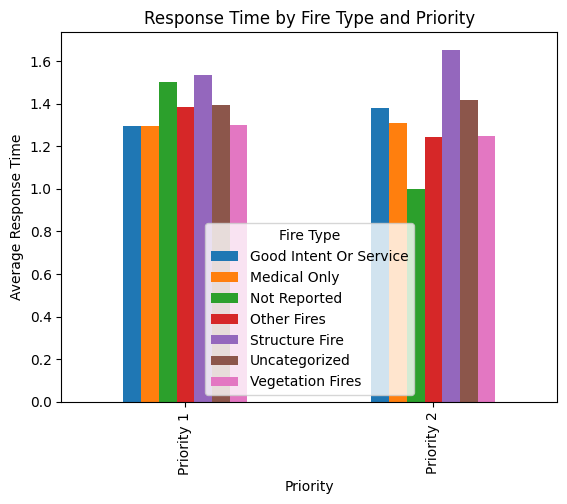

In [ ]:
import matplotlib.pyplot as plt

df.groupby(['Priority', 'Final_Incident_Category'])['Response_Time'].mean().unstack().plot(kind='bar')
plt.title('Response Time by Fire Type and Priority')
plt.xlabel('Priority')
plt.ylabel('Average Response Time')
plt.legend(title='Fire Type')
plt.show()


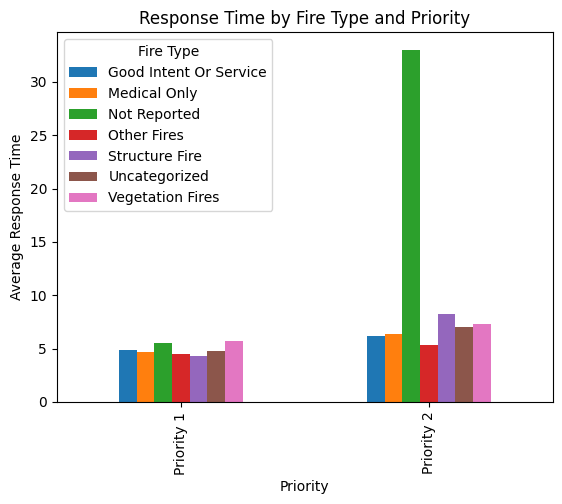

In [ ]:
df.groupby(['Priority', 'Final_Incident_Category'])['Time_To_Reach'].mean().unstack().plot(kind='bar')
plt.title('Response Time by Fire Type and Priority')
plt.xlabel('Priority')
plt.ylabel('Average Response Time')
plt.legend(title='Fire Type')
plt.show()


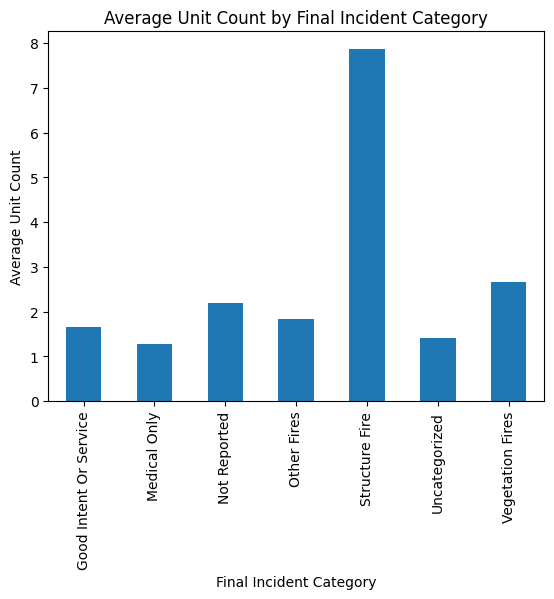

In [ ]:
df.groupby('Final_Incident_Category')['Unit_Count'].mean().plot(kind='bar')
plt.title('Average Unit Count by Final Incident Category')
plt.xlabel('Final Incident Category')
plt.ylabel('Average Unit Count')
plt.xticks(rotation=90)
plt.show()


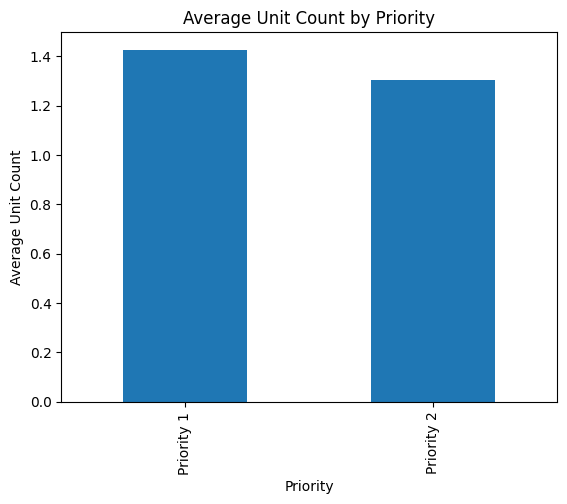

In [ ]:
df.groupby('Priority')['Unit_Count'].mean().plot(kind='bar')
plt.title('Average Unit Count by Priority')
plt.xlabel('Priority')
plt.ylabel('Average Unit Count')
plt.show()


In [ ]:
df.groupby('Priority')['Response_Time'].mean().plot(kind='bar')
plt

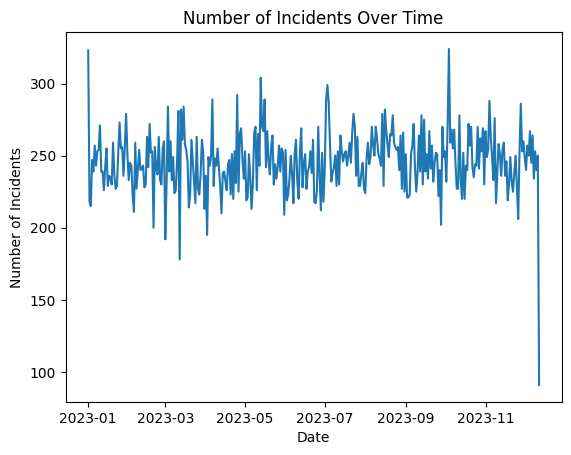

In [ ]:
# Assuming there's a 'date' column in your dataframe
df['Date'] = pd.to_datetime(df['Date'])
df.groupby(df['Date'].dt.date).size().plot(kind='line')
plt.title('Number of Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.show()
